In [ ]:
# Required packages
import pandas as pd       # For data handling
import numpy as np        # For numerical operations (optional but useful)
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns     # For nicer statistical plots
import scienceplots
from scipy.stats import skew

In [2]:
# Load the Parquet file
df = pd.read_parquet("~/Desktop/APMProjects/Project1/segmentation.parquet")

In [3]:
df.head()  # Quick peek at the data

,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159


In [4]:
# print(df.describe())   # Summary statistics for numeric columns
print(df.info())       # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Columns: 119 entries, Cell to YCentroid
dtypes: category(2), float64(49), int32(68)
memory usage: 1.3 MB
None


In [5]:
list(df.columns) # List of all columns in the DataFrame


['Cell',
 'Case',
 'Class',
 'AngleCh1',
 'AngleStatusCh1',
 'AreaCh1',
 'AreaStatusCh1',
 'AvgIntenCh1',
 'AvgIntenCh2',
 'AvgIntenCh3',
 'AvgIntenCh4',
 'AvgIntenStatusCh1',
 'AvgIntenStatusCh2',
 'AvgIntenStatusCh3',
 'AvgIntenStatusCh4',
 'ConvexHullAreaRatioCh1',
 'ConvexHullAreaRatioStatusCh1',
 'ConvexHullPerimRatioCh1',
 'ConvexHullPerimRatioStatusCh1',
 'DiffIntenDensityCh1',
 'DiffIntenDensityCh3',
 'DiffIntenDensityCh4',
 'DiffIntenDensityStatusCh1',
 'DiffIntenDensityStatusCh3',
 'DiffIntenDensityStatusCh4',
 'EntropyIntenCh1',
 'EntropyIntenCh3',
 'EntropyIntenCh4',
 'EntropyIntenStatusCh1',
 'EntropyIntenStatusCh3',
 'EntropyIntenStatusCh4',
 'EqCircDiamCh1',
 'EqCircDiamStatusCh1',
 'EqEllipseLWRCh1',
 'EqEllipseLWRStatusCh1',
 'EqEllipseOblateVolCh1',
 'EqEllipseOblateVolStatusCh1',
 'EqEllipseProlateVolCh1',
 'EqEllipseProlateVolStatusCh1',
 'EqSphereAreaCh1',
 'EqSphereAreaStatusCh1',
 'EqSphereVolCh1',
 'EqSphereVolStatusCh1',
 'FiberAlign2Ch3',
 'FiberAlign2Ch4',
 '

In [ ]:
# Extract the training subset indicated by the "Case" column
train_df = df[df["Case"] == "Train"]
train_df.head()  # Preview the subset

,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
11,207932484,Train,WS,109.416426,0,256,0,18.828571,125.938776,13.600000,...,13.922937,18.643027,40.331747,0,0,2,17.546861,0,211,495
14,207932459,Train,PS,104.278654,0,258,0,17.570850,124.368421,22.461538,...,12.324971,17.747143,41.928533,0,0,2,17.660339,0,172,207


In [8]:
train_df.shape

(1009, 119)

In [9]:
# Assign the first 3 columns to new variables
# These columns are assumed to be "Cell", "Class", and "Case"
cellID = train_df["Cell"]
case = train_df["Case"]
class_ = train_df["Class"]
# Drop the specified columns
train_df = train_df.drop(["Cell", "Class", "Case"], axis=1)

In [10]:
train_df.head()  # Preview the modified DataFrame

,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,AvgIntenStatusCh2,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,133.752037,0,819,1,31.923274,205.878517,69.916880,164.153453,0,0,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,106.646387,0,431,0,28.038835,115.315534,63.941748,106.696602,0,0,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,69.150325,0,298,0,19.456140,101.294737,28.217544,31.028070,0,0,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
11,109.416426,0,256,0,18.828571,125.938776,13.600000,46.800000,0,0,...,13.922937,18.643027,40.331747,0,0,2,17.546861,0,211,495
14,104.278654,0,258,0,17.570850,124.368421,22.461538,71.206478,0,0,...,12.324971,17.747143,41.928533,0,0,2,17.660339,0,172,207


In [18]:
# Calculate the skewness of the 'VarIntenCh3' as example
skew_value = skew(train_df['VarIntenCh3'], bias=True) # bias=True means that bias correction is off - Fine with large datasets
print(skew_value)


2.3951841812380814


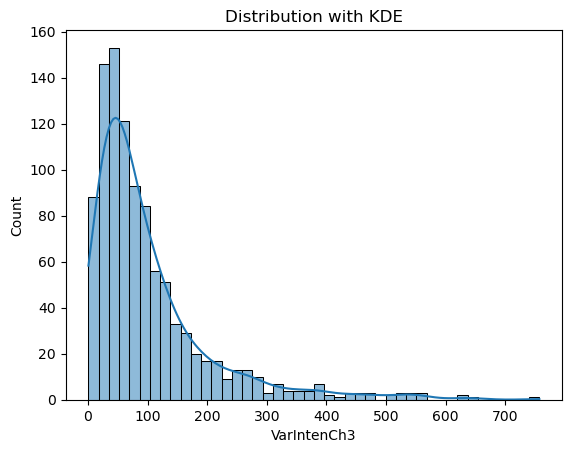

In [38]:
# Visualize the distribution of 'VarIntenCh3' using a histogram
sns.histplot(train_df['VarIntenCh3'], kde=True)
plt.title("Distribution with KDE")
plt.show()

In [42]:
from sklearn.preprocessing import PowerTransformer
# Assume train_df is your dataframe with predictors

# Box-Cox requires all positive data, so ensure your data meets this condition
pt = PowerTransformer(method='box-cox')

# Fit and transform
train_transformed = pt.fit_transform(train_df)

# Convert back to DataFrame for convenience
train_transformed_df = pd.DataFrame(train_transformed, columns=train_df.columns)


ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [45]:
list(train_df.columns)

['AngleCh1',
 'AngleStatusCh1',
 'AreaCh1',
 'AreaStatusCh1',
 'AvgIntenCh1',
 'AvgIntenCh2',
 'AvgIntenCh3',
 'AvgIntenCh4',
 'AvgIntenStatusCh1',
 'AvgIntenStatusCh2',
 'AvgIntenStatusCh3',
 'AvgIntenStatusCh4',
 'ConvexHullAreaRatioCh1',
 'ConvexHullAreaRatioStatusCh1',
 'ConvexHullPerimRatioCh1',
 'ConvexHullPerimRatioStatusCh1',
 'DiffIntenDensityCh1',
 'DiffIntenDensityCh3',
 'DiffIntenDensityCh4',
 'DiffIntenDensityStatusCh1',
 'DiffIntenDensityStatusCh3',
 'DiffIntenDensityStatusCh4',
 'EntropyIntenCh1',
 'EntropyIntenCh3',
 'EntropyIntenCh4',
 'EntropyIntenStatusCh1',
 'EntropyIntenStatusCh3',
 'EntropyIntenStatusCh4',
 'EqCircDiamCh1',
 'EqCircDiamStatusCh1',
 'EqEllipseLWRCh1',
 'EqEllipseLWRStatusCh1',
 'EqEllipseOblateVolCh1',
 'EqEllipseOblateVolStatusCh1',
 'EqEllipseProlateVolCh1',
 'EqEllipseProlateVolStatusCh1',
 'EqSphereAreaCh1',
 'EqSphereAreaStatusCh1',
 'EqSphereVolCh1',
 'EqSphereVolStatusCh1',
 'FiberAlign2Ch3',
 'FiberAlign2Ch4',
 'FiberAlign2StatusCh3',
 'Fib

In [46]:
import pandas as pd

# Assuming df is your DataFrame

summary = []

for col in train_df.columns:
    col_type = train_df[col].dtype
    # Default: Box-Cox not applicable
    boxcox_applicable = False
    
    # Check if numeric type
    if pd.api.types.is_numeric_dtype(train_df[col]):
        # Check if strictly positive (all values > 0)
        if (train_df[col] > 0).all():
            boxcox_applicable = True
    
    summary.append({
        'Column': col,
        'Data Type': col_type,
        'Box-Cox Applicable': boxcox_applicable
    })

summary_df = pd.DataFrame(summary)
print(summary_df)


                Column Data Type  Box-Cox Applicable
0             AngleCh1   float64                True
1       AngleStatusCh1     int32               False
2              AreaCh1     int32                True
3        AreaStatusCh1     int32               False
4          AvgIntenCh1   float64                True
..                 ...       ...                 ...
111  VarIntenStatusCh4     int32               False
112           WidthCh1   float64                True
113     WidthStatusCh1     int32               False
114          XCentroid     int32                True
115          YCentroid     int32                True

[116 rows x 3 columns]


In [50]:
# Function to check suitability of Box-Cox and Yeo-Johnson transformations
def check_transform_suitability(df, save_excel=False, excel_path='transform_suitability.xlsx'):
    """
    Check suitability of each column for Box-Cox and Yeo-Johnson transformations.
    
    Parameters:
    - df: pandas DataFrame
    - save_excel: bool, whether to save the summary dataframe to an Excel file (default False)
    - excel_path: str, path to save the Excel file if save_excel=True
    
    Returns:
    - summary_df: DataFrame with columns ['Column', 'Data Type', 'Box-Cox Applicable', 'Yeo-Johnson Applicable']
    - boxcox_cols: list of columns suitable for Box-Cox
    - yeojohnson_cols: list of columns suitable for Yeo-Johnson
    """
    
    summary_list = []
    
    for col in df.columns:
        dtype = df[col].dtype
        
        # Box-Cox requires numeric and strictly positive
        boxcox_applicable = False
        yeojohnson_applicable = False
        
        if pd.api.types.is_numeric_dtype(dtype):
            col_data = df[col].dropna()
            # Box-Cox requires all values > 0
            if (col_data > 0).all():
                boxcox_applicable = True
            # Yeo-Johnson works for all numeric (including 0 and negatives)
            yeojohnson_applicable = True
        
        summary_list.append({
            'Column': col,
            'Data Type': str(dtype),
            'Box-Cox Applicable': boxcox_applicable,
            'Yeo-Johnson Applicable': yeojohnson_applicable
        })
    
    summary_df = pd.DataFrame(summary_list)
    
    boxcox_cols = summary_df[summary_df['Box-Cox Applicable']]['Column'].tolist()
    yeojohnson_cols = summary_df[summary_df['Yeo-Johnson Applicable']]['Column'].tolist()
    
    if save_excel:
        summary_df.to_excel(excel_path, index=False)
        print(f"Summary saved to {excel_path}")
    
    return summary_df, boxcox_cols, yeojohnson_cols


In [52]:
summary_df, boxcox_cols, yeojohnson_cols = check_transform_suitability(train_df, save_excel=True)

print(summary_df.head())

# Create new DataFrames with only columns suitable for each transform:
df_boxcox = train_df[boxcox_cols]
df_yeojohnson = train_df[yeojohnson_cols]


Summary saved to transform_suitability.xlsx
           Column Data Type  Box-Cox Applicable  Yeo-Johnson Applicable
0        AngleCh1   float64                True                    True
1  AngleStatusCh1     int32               False                    True
2         AreaCh1     int32                True                    True
3   AreaStatusCh1     int32               False                    True
4     AvgIntenCh1   float64                True                    True


In [49]:
summary_df.to_csv('boxcox_suitability_summary.csv', index=False)
print("Saved summary to 'boxcox_suitability_summary.csv'")

Saved summary to 'boxcox_suitability_summary.csv'
